In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
#Ler a Base 
df = pd.read_excel('base_consolidada.xlsx')
df.drop(columns='Unnamed: 0',inplace=True)

In [3]:
#O dataset que foi tratado na etapa de preparação mostra as depesas, anuais e mensais, de diversos senadores.

#O campo de interesse da análise é o "Valor Reembolsado", que expressa o quanto do valor da despesa o senador deixou de pagar
#e foi rembolsado através de dinheiro público, ou seja, o quanto essa despesa custou de fato.

df.head(10)

,ANO,MES,SENADOR,TIPO_DESPESA,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,DIA,DT_DATA
0,2009,12,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",GILBERTO PISELO DO NASCIMENTO,11/12/2009,SEM DETALHAMENTO,5000.00,11,2009-12-11
1,2009,12,ACIR GURGACZ,Divulgação da atividade parlamentar,INTERCOM INTERMEDIAÇÕES E COMUNICAÇÃO INTEGRAD...,09/12/2009,SEM DETALHAMENTO,12620.00,9,2009-12-09
2,2009,4,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",Cascol combustíveis para veículos Ltda,12/04/2009,SEM DETALHAMENTO,179.01,12,2009-04-12
3,2009,4,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",Ribeiro e Pereira Ltda,04/04/2009,SEM DETALHAMENTO,30.00,4,2009-04-04
4,2009,4,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",Tudo de Bom Comércio de alimentos Ltda,14/04/2009,SEM DETALHAMENTO,215.80,14,2009-04-14
5,2009,5,ADELMIR SANTANA,"Contratação de consultorias, assessorias, pesq...",C A Guimarães Baião Consultores Associados S/S...,05/06/2009,SEM DETALHAMENTO,12475.00,5,2009-05-05
6,2009,5,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",ML alimentações e diversões S/A,02/05/2009,SEM DETALHAMENTO,420.00,2,2009-05-02
7,2009,5,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",Parigi - Restaurante fasano LTDA,21/05/2009,SEM DETALHAMENTO,546.00,21,2009-05-21
8,2009,6,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",A M Comercial de Combustíveis Ltda,24/06/2009,SEM DETALHAMENTO,130.00,24,2009-06-24
9,2009,6,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",Auto posto J B Ltda,24/06/2009,SEM DETALHAMENTO,250.00,24,2009-06-24


In [4]:
#De cara, vamos entender quais senadores, historicamente, são os mais custosos.

df_historico = df.groupby('SENADOR').sum()['VALOR_REEMBOLSADO']
df_historico = df_historico.sort_values()
df_historico = df_historico.round(2)

In [5]:
fig = px.bar(df_historico.tail(5),
            orientation = 'h',
            title='Quais Senadores mais caros?',
            labels=dict(SENADOR="Senador", value="Valor da Despesa (R$)"),
            text='value')

fig.update_layout(showlegend=False)

fig.show()

In [6]:
#Sergio Petecão, você foi o escolhido. Vamos ver quais tipos de despesas favoritas do senador


df_em = df.loc[df['SENADOR'] == 'SÉRGIO PETECÃO']
df_em_dp = df_em.groupby('TIPO_DESPESA',as_index=False).sum()
df_em_dp['DESPESAS'] = 'DESPESAS'

In [7]:
fig = px.pie(df_em_dp, 
             values="VALOR_REEMBOLSADO", 
             names="TIPO_DESPESA",
            hole=.6)

fig.update_layout(legend=dict(
    orientation="h"
))

fig.show()

In [8]:
#Ok,não dá pra analisar caso a caso... por enquanto. 
#No final, vou desponibilizar uma visualização para que você possa se divertir.

#Agora, vamos analisar os dados com um olhar um pouco mais estatistico

#Primeiro, vamos agregar os dados para análise
df_data = df.groupby(['ANO']).agg(['sum','mean'])
df_data = df_data['VALOR_REEMBOLSADO'].reset_index()
df_data.loc[df_data['ANO'] != 2022]
df_data = df_data.loc[df_data['ANO'] != 2022]


In [9]:
#Aqui vamos dar uma olhadinha em quanto do nosso dinheiro é reembolsado de forma anual, para nossos queridos senadores

from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Scatter(x=df_data['ANO'], y=df_data['sum'],
                    mode='lines',
                    name='Despesas totais',
                    ),row=1, col=1)

fig.add_trace(go.Scatter(x=df_data['ANO'], y=df_data['mean'],
                    mode='lines+markers',
                    name='Média de despesas',
                    ),row=2, col=1)

fig.update_layout(title_text="Despesas Totais e Média de Despesas | Anuais")

fig.show()

In [10]:
#As maiores despesas estão no ano de 2021, vamos abrir o mês a mês

df_15 = df.loc[df['ANO'] == 2020]
df_15_gb = df_15.groupby(['MES']).agg(['sum','mean'])['VALOR_REEMBOLSADO'].reset_index()

#################################################################################################

fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Scatter(x=df_15_gb['MES'], y=df_15_gb['sum'],
                    mode='lines',
                    name='Despesas totais',
                    ),row=1, col=1)

fig.add_trace(go.Scatter(x=df_15_gb['MES'], y=df_15_gb['mean'],
                    mode='lines+markers',
                    name='Média de despesas',
                    ),row=2, col=1)

fig.update_layout(title_text="Despesas Totais e Média de Despesas | Mensal - 2020")

fig.show()


In [11]:
#Verificar possiveis sazonalidades no mês

df_month = df.groupby('MES',as_index=False).sum()[['MES','VALOR_REEMBOLSADO']]
df_month

fig = px.line(x=df_month['MES'], y=df_month['VALOR_REEMBOLSADO'])
fig.update_layout(title='Despesas Acumuladas | Mês')
fig.update_xaxes(title='Mês',dtick=1)
fig.update_yaxes(title='Valor Reembolso')

fig.show()

##Os ultimos meses costumam ser os com mais despesas.

## Forecast Simples

* Tentar utilizar alguns modelos de forecast com intuito de prever as despesas de anos futuros

In [18]:
from fbprophet import Prophet
df_fore = df.groupby('DT_DATA').sum()['VALOR_REEMBOLSADO'].reset_index()
df_fore

,DT_DATA,VALOR_REEMBOLSADO
0,2009-04-01,67578.68
1,2009-04-02,29729.72
2,2009-04-03,15507.93
3,2009-04-04,25651.46
4,2009-04-05,31413.53
...,...,...
4768,2022-04-26,232.46
4769,2022-04-27,4877.46
4770,2022-04-28,1379.66
4771,2022-04-29,9522.40


# Teste 1 - Prophet

In [20]:
df_fore = df_fore.rename(columns={'DT_DATA':'ds','VALOR_REEMBOLSADO':'y'})

In [77]:
df_fore_mensal = df_fore.set_index('ds').groupby(pd.Grouper(freq='M')).sum().reset_index()
df_fore_mensal_test = df_fore_mensal[df_fore_mensal['ds'].dt.year < 2020]

In [78]:
model = Prophet()
model.fit(df_fore_mensal_test)
df_forecast = model.make_future_dataframe(periods=1,freq='M')
forecast = model.predict(df_forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
125,2019-09-30,2.049642e+06,1.743255e+06,2.385654e+06
126,2019-10-31,2.228482e+06,1.881596e+06,2.543816e+06
127,2019-11-30,2.436244e+06,2.105718e+06,2.762497e+06
128,2019-12-31,2.760244e+06,2.417651e+06,3.072918e+06
129,2020-01-31,1.739189e+06,1.412070e+06,2.088051e+06


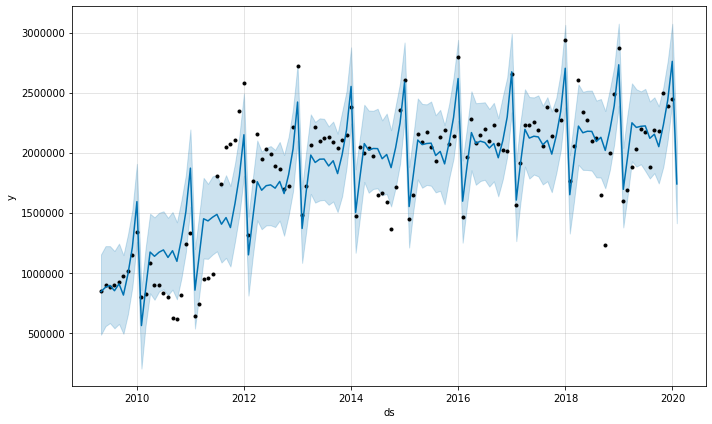

In [79]:
fig1 = model.plot(forecast)

In [83]:
df_fore_mensal[df_fore_mensal['ds'].dt.year == 2020]

,ds,y
129,2020-01-31,1394867.81
130,2020-02-29,1934382.69
131,2020-03-31,1898897.77
132,2020-04-30,1367194.40
133,2020-05-31,1424952.36
134,2020-06-30,1336632.91
135,2020-07-31,1443425.10
136,2020-08-31,1474374.82
137,2020-09-30,1694042.14
138,2020-10-31,1740068.00


In [84]:
# Teste 2 - 